In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import oceanspy as ospy
import matplotlib.pyplot as plt
import numpy as np
from oceanspy.utils import viewer2range
import xarray as xr

In [ ]:
from oceanspy.llc_rearrange import splitter, fill_path

In [3]:
Catalog_url = 'LLC4320_test.yaml'

# Create lazy dataset object

## ECCO

In [4]:
# Directory
ECCOod = ospy.open_oceandataset.from_catalog("ECCO", Catalog_url)
ECCOod._ds

Opening ECCO.


<xarray.Dataset>
Dimensions:    (Xp1: 90, Z: 50, Y: 90, face: 13, time: 1, Yp1: 90, X: 90,
                Zp1: 51, Zu: 50, Zl: 50, time_midp: 0)
Coordinates: (12/41)
  * Xp1        (Xp1) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
    k          (Z) int64 dask.array<chunksize=(50,), meta=np.ndarray>
  * Y          (Y) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * face       (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * Z          (Z) float32 -5.0 -15.0 -25.0 ... -5.039e+03 -5.461e+03 -5.906e+03
    timestep   (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    ...         ...
    HFacC      (Z, face, Y, X) float32 dask.array<chunksize=(50, 13, 90, 90), meta=np.ndarray>
    HFacW      (Z, face, Y, Xp1) float32 dask.array<chunksize=(50, 13, 90, 90), meta=np.ndarray>
    maskW      (Z, face, Y, Xp1) bool dask.array<chunksize=(50, 13, 90, 90), meta=np.ndarray>
    maskC      (Z, face, Y, X) bool dask.array<chunksize=(50, 13, 90, 90), meta=np.ndarray>
    maskS      (Z, face, Yp1, X) bool dask.array<chunksize=(50, 13, 90, 90), meta=np.ndarray>
  * time_midp  (time_midp) datetime64[ns] 
Data variables:
    U          (time, Z, face, Y, Xp1) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    V          (time, Z, face, Yp1, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    T          (time, Z, face, Y, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
Attributes: (12/22)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 3 Extension (ECCOv4r...
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    ...                           ...
    geospatial_vertical_max:      -5.0
    date_created:                 Tue Aug 27 13:39:23 2019
    time_coverage_start:          1992-01-01T00:00:00
    time_coverage_end:            1992-02-01T00:00:00
    OceanSpy_grid_coords:         {'Y': {'Y': None, 'Yp1': -0.5}, 'X': {'X': ...
    OceanSpy_face_connections:    {'face': {0: {'X': ((12, 'Y', False), (3, '...

# DYAMOND

In [5]:
DYAMONDod = ospy.open_oceandataset.from_catalog("DYAMOND", Catalog_url)
DYAMONDod._ds

Opening DYAMOND.
10 day hourly data from the Dyamond computed using the MITGCM, a general, curvilinear ocean simulation on the cube-sphere.


<xarray.Dataset>
Dimensions:    (face: 13, Y: 2160, X: 2160, time: 1, Z: 90, Zp1: 91, Yp1: 2160,
                Xp1: 2160, Zl: 90, Zu: 90, time_midp: 0)
Coordinates: (12/45)
    CS         (face, Y, X) float32 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    Depth      (face, Y, X) float32 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    PHrefC     (Z) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    PHrefF     (Zp1) float32 dask.array<chunksize=(91,), meta=np.ndarray>
    SN         (face, Y, X) float32 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    XC         (face, Y, X) float32 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    ...         ...
    rSurfC     (face, Y, X) float32 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    rSurfS     (face, Yp1, X) float32 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    rSurfW     (face, Y, Xp1) float32 dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    rhoRef     (Z) float32 dask.array<chunksize=(90,), meta=np.ndarray>
  * time       (time) datetime64[ns] 2011-01-17
  * time_midp  (time_midp) datetime64[ns] 
Data variables:
    Eta        (time, face, Y, X) float32 dask.array<chunksize=(1, 1, 2160, 2160), meta=np.ndarray>
Attributes:
    OceanSpy_parameters:        {'rSphere': 6371.0, 'eq_state': 'jmd95', 'rho...
    OceanSpy_name:              LLC4320
    OceanSpy_description:       10 day hourly data from the Dyamond computed ...
    OceanSpy_grid_coords:       {'Y': {'Y': None, 'Yp1': -0.5}, 'X': {'X': No...
    OceanSpy_face_connections:  {'face': {0: {'X': ((12, 'Y', False), (3, 'X'...

# LLC4320

In [6]:
LLC4320od = ospy.open_oceandataset.from_catalog("LLC4320", Catalog_url)
LLC4320od._ds

Opening LLC4320.
10 day hourly data from the LLC4320 simulations computed using the MITGCM, a general, curvilinear ocean simulation on the cube-sphere.


<xarray.Dataset>
Dimensions:    (face: 13, Y: 4320, X: 4320, time: 1, Yp1: 4320, Xp1: 4320,
                time_midp: 0)
Coordinates: (12/27)
    CS         (face, Y, X) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    Depth      (face, Y, X) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    SN         (face, Y, X) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    XC         (face, Y, X) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    XG         (face, Yp1, Xp1) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    YC         (face, Y, X) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    ...         ...
    rA         (face, Y, X) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    rAs        (face, Yp1, X) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    rAw        (face, Y, Xp1) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    rAz        (face, Yp1, Xp1) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
  * time       (time) datetime64[ns] 2011-09-13
  * time_midp  (time_midp) datetime64[ns] 
Data variables:
    Eta        (time, face, Y, X) float32 dask.array<chunksize=(1, 1, 4320, 4320), meta=np.ndarray>
Attributes:
    OceanSpy_parameters:        {'rSphere': 6371.0, 'eq_state': 'jmd95', 'rho...
    OceanSpy_name:              LLC4320
    OceanSpy_description:       10 day hourly data from the LLC4320 simulatio...
    OceanSpy_grid_coords:       {'Y': {'Y': None, 'Yp1': -0.5}, 'X': {'X': No...
    OceanSpy_face_connections:  {'face': {0: {'X': ((12, 'Y', False), (3, 'X'...

# Examples

In [7]:
R = ECCOod.parameters['rSphere']
# face_connections = ECCOod.face_connections['face']

## 1) Single face 10 (rotated)

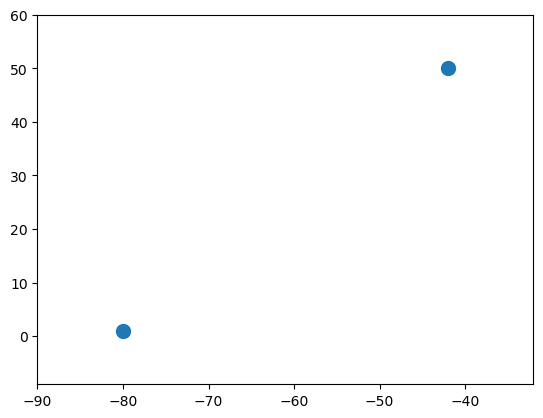

In [8]:
Xmoor0 = np.array([-80, -42])
Ymoor0 = np.array([1, 50])
plt.plot(Xmoor0, Ymoor0, ls='',marker='o', markersize=10)
plt.xlim(np.min(Xmoor0)-10, np.max(Xmoor0)+10)
plt.ylim(np.min(Ymoor0)-10, np.max(Ymoor0)+10)
plt.show()

[11, 10]
face2axis:  {0: (11, 1, 0), 1: (10, 0, 0)}
CPU times: user 59.5 ms, sys: 2.87 ms, total: 62.4 ms
Wall time: 61.6 ms


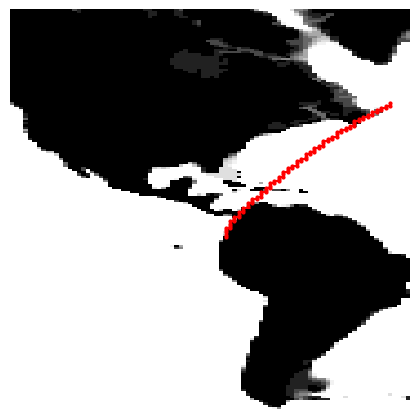

In [11]:
%%time
rectangular = False
if rectangular:
    R = None
else:
    R = 6371.0
ECCOod.parameters['rSphere']=R

_ = ECCOod.plot.faces_array(Ymoor=Ymoor0, Xmoor=Xmoor0, markersize=4, color='r', ls='-', figsize=(4, 4))

[11, 10]
face2axis:  {0: (11, 1, 0), 1: (10, 0, 0)}
CPU times: user 22.1 s, sys: 771 ms, total: 22.9 s
Wall time: 4.2 s


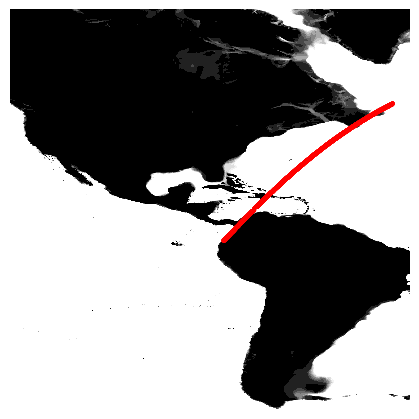

In [12]:
%%time
rectangular = False
if rectangular:
    R = None
else:
    R = 6371.0
ECCOod.parameters['rSphere'] = R

_ = DYAMONDod.plot.faces_array(Ymoor=Ymoor0, Xmoor=Xmoor0, markersize=4, color='r', ls='-', figsize=(4, 4))

[11, 10]
face2axis:  {0: (11, 1, 0), 1: (10, 0, 0)}
CPU times: user 1min 34s, sys: 6.83 s, total: 1min 41s
Wall time: 21.4 s


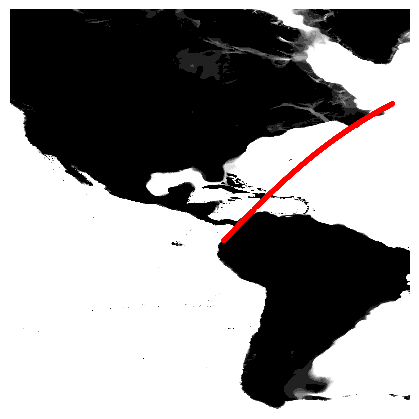

In [13]:
%%time
rectangular = False
if rectangular:
    R = None
else:
    R = 6371.0
ECCOod.parameters['rSphere'] = R

_ = LLC4320od.plot.faces_array(Ymoor=Ymoor0, Xmoor=Xmoor0, markersize=4, color='r', ls='-', figsize=(4, 4))